## Weißeritz Data Compilation

This is data from monitoring in the Upper Weißeritz basin, Eastern Ore Mountains.

(cc) jackisch@kit.edu, graeff@uni-potsdam.de

In [29]:
import numpy as np
import pandas as pd
import scipy as sp
import os, sys
from sklearn import linear_model
%pylab inline

import seaborn as sns
sns.set(style='whitegrid', palette='deep')

matplotlib.rcParams['svg.fonttype'] = 'none'

Populating the interactive namespace from numpy and matplotlib


### Gauge Becherbach

In [8]:
# Rating Curve
H_Q=pd.read_csv('./becherbach_gauge/gauge_becherbach_calibration.dat',sep=';')
H_Q.Date=pd.to_datetime(H_Q.Date)

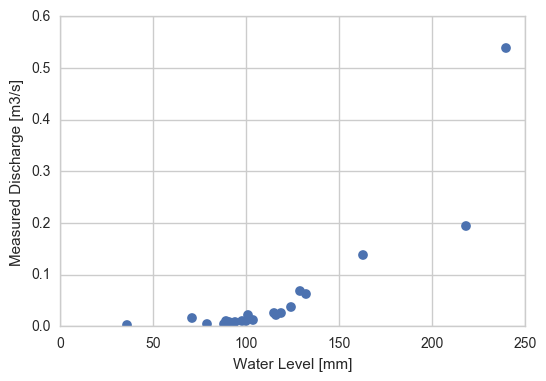

In [102]:
figsize(6,4)
plot(H_Q.Gauge,H_Q.Q_m3s,'o')
xlabel('Water Level [mm]')
ylabel('Measured Discharge [m3/s]')

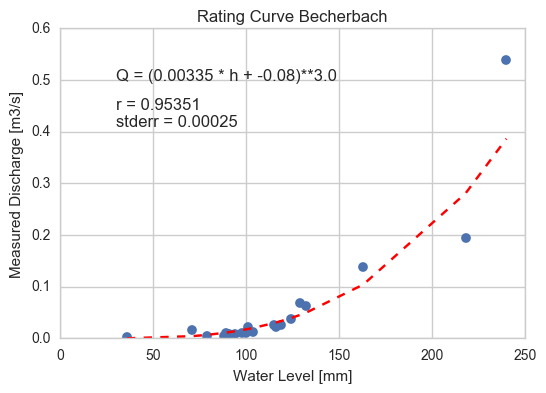

In [103]:
trans_fac=3.
X=H_Q.Gauge.values
Y=H_Q.Q_m3s.values**(1./trans_fac)

#Linear regressison -polyfit - polyfit can be used other orders polys
(ar,br)=sp.polyfit(X,Y,1)
xr=polyval([ar,br],X)
#compute the mean square error
err=sqrt(sum((xr-Y)**2)/len(X))

(xslope,xinter,r,p,stderr)=sp.stats.linregress(X,Y)
def Q_ret(h,saver=True):
    Q = (xslope*h + xinter)**trans_fac
    if saver:
        Q[Q<0.] = np.nan
    return Q

idx=np.argsort(X)
xr=Q_ret(X[idx])

# Plot outputs
figsize(6,4)
#plot(H_Q.Gauge,H_Q.Q_m3s**(1./trans_fac),'o',label='measured Q')
#plot(X[idx],xr**(1./trans_fac),'r--',label='fitted Q')
#yticks(np.arange(10)/10.,(np.arange(10)/10.)**3.)
#text(30,0.75,'Q = (%.5f * h + %.2f)**%.1f' % (ar,br,trans_fac))
#text(30,0.65,'r = %.5f\nstderr = %.5f' % (r,stderr))

plot(H_Q.Gauge,H_Q.Q_m3s,'o',label='measured Q')
plot(X[idx],xr,'r--',label='fitted Q')
text(30,0.5,'Q = (%.5f * h + %.2f)**%.1f' % (ar,br,trans_fac))
text(30,0.41,'r = %.5f\nstderr = %.5f' % (r,stderr))

xlabel('Water Level [mm]')
ylabel('Measured Discharge [m3/s]')
title('Rating Curve Becherbach')

In [131]:
# read Becherbach gauge levels and convert to discharge
Becher = pd.read_csv('./becherbach_gauge/gauge_becherbach_1109_0510.csv')
Becher1 = pd.read_csv('./becherbach_gauge/gauge_becherbach_1010_0313.csv')
Becher.index = pd.to_datetime(Becher.datetime,format="%d/%m/%Y %H:%M")
Becher1.index = pd.to_datetime(Becher1.datetime,format="%d/%m/%Y %H:%M")

In [132]:
Becher=pd.concat([Becher,Becher1])

In [134]:
Becher['Q_m3s']=Q_ret(Becher.Levela_mm)

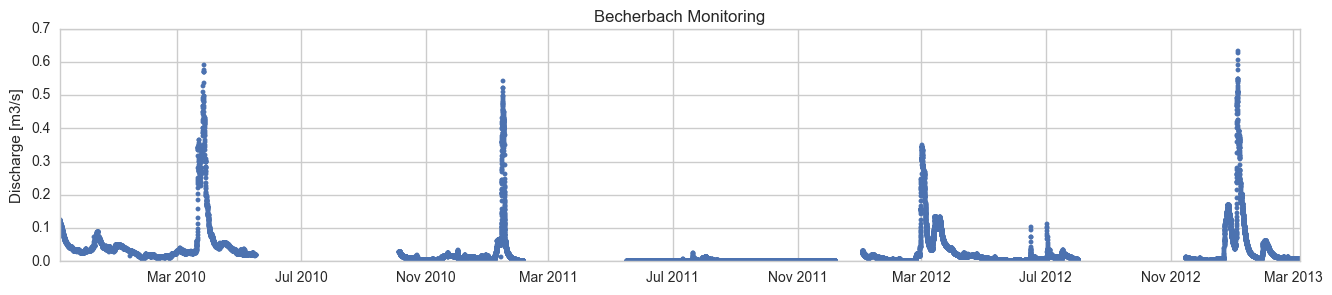

In [135]:
figsize(16,3)
plot(Becher.Q_m3s,'.')
ylabel('Discharge [m3/s]')
title('Becherbach Monitoring')

In [163]:
#read condi at becherbach gauge
condB = pd.read_csv('./condi_becherbach_9773880.csv',skiprows=1,sep=';',thousands=',')
condB.columns=['sample','datetime','C_muScm','T_C']
condB.index=pd.to_datetime(condB.datetime,format='%d/%m/%y %H:%M:%S')

(0, 0.7)

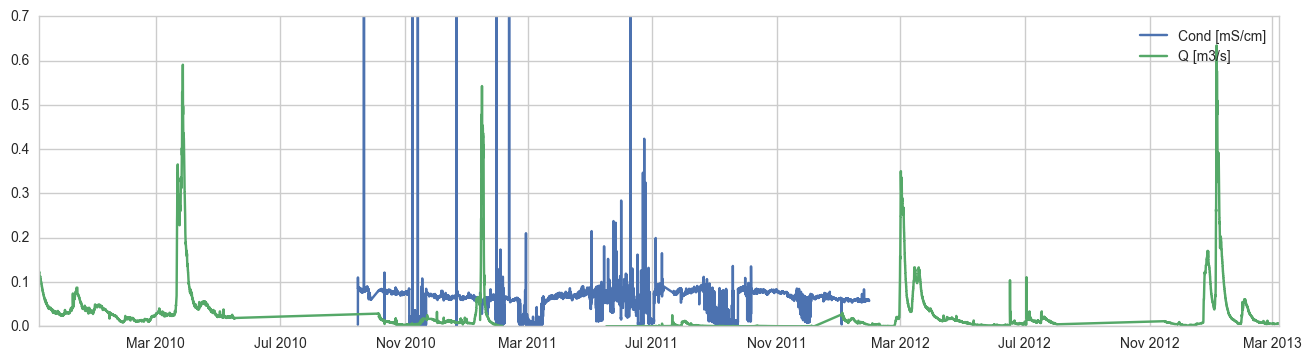

In [254]:
plot(condB.C_muScm/1000.,label='Cond [mS/cm]')
plot(Becher.Q_m3s,label='Q [m3/s]')
legend()
ylim(0,0.7)

### Becherbach Soil Moisture Monitoring

In [255]:
SM_B1 = pd.read_excel('../weisseritz_compile/soilmoist/EM50_becherbach_stations.xlsx',sheetname='EM11385.csv',skiprows=2)
SM_B2 = pd.read_excel('../weisseritz_compile/soilmoist/EM50_becherbach_stations.xlsx',sheetname='EM11384.csv',skiprows=2)
SM_B3 = pd.read_excel('../weisseritz_compile/soilmoist/EM50_becherbach_stations.xlsx',sheetname='EM11391.csv',skiprows=2)
SM_B4 = pd.read_excel('../weisseritz_compile/soilmoist/EM50_becherbach_stations.xlsx',sheetname='EM12138.csv',skiprows=2)

SM_B1.index = pd.to_datetime(SM_B1.iloc[:,0])
SM_B1.columns = ['Time','MPS1_kPa','5TE1_m3m3','5TE1_C','5TE1_mScm','MPS2_kPa','5TE2_m3m3','5TE2_C','5TE2_mScm','5TE3_m3m3','5TE3_C','5TE3_mScm']
SM_B2.index = pd.to_datetime(SM_B2.iloc[:,0])
SM_B2.columns = ['Time','5TE1_m3m3','5TE1_C','5TE1_mScm','MPS1_kPa','5TE2_m3m3','5TE2_C','5TE2_mScm','MPS2_kPa','5TE3_m3m3','5TE3_C','5TE3_mScm']
SM_B3.index = pd.to_datetime(SM_B3.iloc[:,0])
SM_B3.columns = ['Time','5TE1_m3m3','5TE1_C','5TE1_mScm','MPS1_kPa','5TE2_m3m3','5TE2_C','5TE2_mScm','MPS2_kPa','5TE3_m3m3','5TE3_C','5TE3_mScm']
SM_B4.index = pd.to_datetime(SM_B4.iloc[:,0])
SM_B4.columns = ['Time','5TE1_m3m3','5TE1_C','5TE1_mScm','5TE2_m3m3','5TE2_C','5TE2_mScm','5TE3_m3m3','5TE3_C','5TE3_mScm','5TE4_m3m3','5TE4_C','5TE4_mScm','5TE5_m3m3','5TE5_C','5TE5_mScm']


In [256]:
## Stations

#B1 - Pasture, uphill, exposed

#Profile: 20cm Ah
#         45cm B1 silty with gravels
#         75cm B2 silty, more gravel

#guess: pref flow until 50cm

#Probes: 1 MPS1 10 cm
#        2 5TE 10 cm
#        3 MPS1 40 cm
#        4 5TE 40 cm
#        5 5TE 59 cm (gravels! rel. lose!)


#B2 - forest, uphill
#Profile: 3cm Litter
#        17cm Ah, rich in humus
#        30cm Bv eluvial horizon - not same depth everywhere
#        34cm Bc, much gravel
#        67cm B2h humus, slightly oxid
#         Bc/C weathered gravel with B material

#Probes: 1 5TE 10cm
#        2 MPS1 10cm
#        3 5TE  22cm
#        4 MPS1 25cm
#        5 5TE 47cm  much gravel!


#B3 - forest, hillfoot

#Profile: 3cm Litter
#        13cm Ah 10cm Humus (much!)
#        23cm Bv 10cm Eluvial horizon
#        38cm B 15cm tendency to oxidation, humus
#        58cm B 20cm silty, more oxidation
#         Bc/C weathered gravel with B material

#Probes: 1 5TE 10cm 
#        2 MPS1 17 cm
#        3 5TE 17 cm
#        4 MPS1 47 cm
#        5 5TE 46cm

#B4 - pasture, foot
#Probes: 1 7cm lower Ah
#        2 17cm
#        3 27cm
#        4 35cm Interface Bc
#        5 40cm C

In [257]:
SM_B1.columns='B1_'+SM_B1.columns
SM_B2.columns='B2_'+SM_B2.columns
SM_B3.columns='B3_'+SM_B3.columns
SM_B4.columns='B4_'+SM_B4.columns

SM = pd.concat([SM_B1,SM_B2,SM_B3,SM_B4])

### Piezometer data

In [258]:
##read piezometer data
Piezo_B1 = pd.read_excel('../weisseritz_compile_Tomek/monitoring_becherbach/becherbach_weide_oben.xlsx',sheetname='piezometer')
Piezo_B4 = pd.read_excel('../weisseritz_compile_Tomek/monitoring_becherbach/becher_weide_unten.xlsx',sheetname='piezometer')
Piezo_B3 = pd.read_excel('../weisseritz_compile_Tomek/monitoring_becherbach/becher_wald_unten.xlsx',sheetname='piezometer')
Piezo_B2 = pd.read_excel('../weisseritz_compile_Tomek/monitoring_becherbach/becher_wald_oben.xlsx',sheetname='piezometer')

Piezo_B1.index = pd.to_datetime(Piezo_B1.datetime)
Piezo_B1.columns = ['sample','datetime','TWp_C','TWa_C','TAp_C','TAa_C','Levelp_mm','Levela_mm']
Piezo_B2.index = pd.to_datetime(Piezo_B2.datetime)
Piezo_B2.columns = ['sample','datetime','TWp_C','TWa_C','TAp_C','TAa_C','Levelp_mm','Levela_mm']
Piezo_B3.index = pd.to_datetime(Piezo_B3.datetime)
Piezo_B3.columns = ['sample','datetime','TWp_C','TWa_C','TAp_C','TAa_C','Levelp_mm','Levela_mm']
Piezo_B4.index = pd.to_datetime(Piezo_B4.datetime)
Piezo_B4.columns = ['sample','datetime','TWp_C','TWa_C','TAp_C','TAa_C','Levelp_mm','Levela_mm']


In [259]:
piezo = pd.concat([Piezo_B1[['TWa_C','Levela_mm']].resample('20min').mean(),Piezo_B2[['TWa_C','Levela_mm']].resample('20min').mean(),Piezo_B3[['TWa_C','Levela_mm']].resample('20min').mean(),Piezo_B4[['TWa_C','Levela_mm']].resample('20min').mean()],axis=1)
piezo.columns=['B1_TWa_C','B1_Levela_mm','B2_TWa_C','B2_Levela_mm','B3_TWa_C','B3_Levela_mm','B4_TWa_C','B4_Levela_mm']

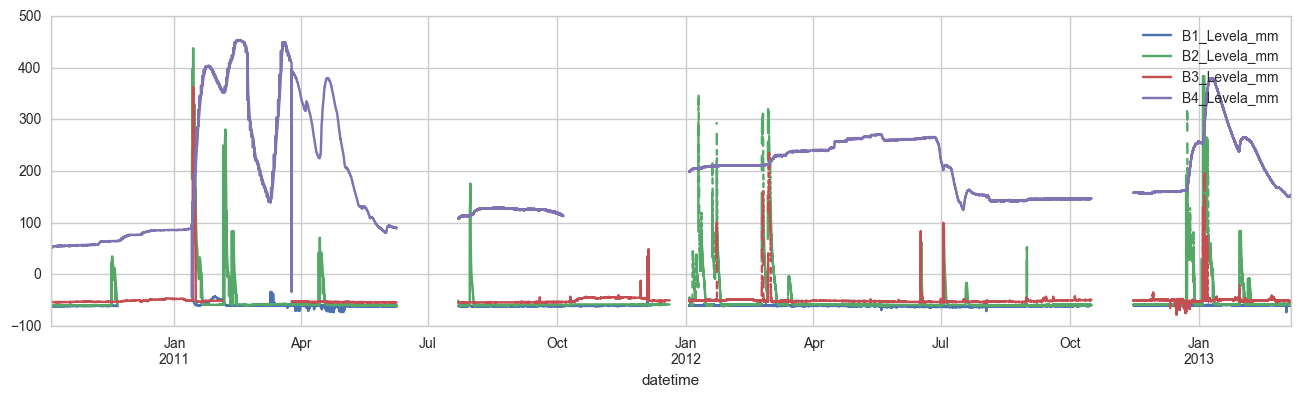

In [260]:
piezo[['B1_Levela_mm','B2_Levela_mm','B3_Levela_mm','B4_Levela_mm']].plot()
legend()

### Davis Rain Gauges

In [261]:
ombro1.event/=ombro1.event
ombro1x=ombro1.loc[ombro1.event==1.]
ombro1x.event*=0.2369728 #mm per event
precip1 = ombro1x.event.resample('20min').sum()
#precip1 = ombro1.event.resample('H').sum()


ombro2.event/=ombro2.event
ombro2x=ombro2.loc[ombro2.event==1.]
ombro2x.event*=0.2127882 #mm per event
precip2 = ombro2x.event.resample('20min').sum()
#precip2 = ombro2.event.resample('H').sum()

#ombro_wasserwerk.event/=ombro_wasserwerk.event
#ombro_wasserwerk.event*=0.2 #mm per event - no calibration???
#precip3 = ombro_wasserwerk.event.resample('15min').sum()

precip = pd.concat([precip1,precip2],axis=1)
precip.columns=['becher1','becher4']

for i in np.arange(len(precip))[2:-3]:
    if (~(precip.iloc[i,0]>=0.)|~(precip.iloc[i,1]>=0.)):
        if all(~(precip.iloc[i,:]>=0.)):
            precip.iloc[i,:]=0.
        else:
            idx=np.where(precip.iloc[i,:]>=0.)[0]
            precip.iloc[i,int(abs(idx-1))]=precip.iloc[i,idx].values


/Users/cojack/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


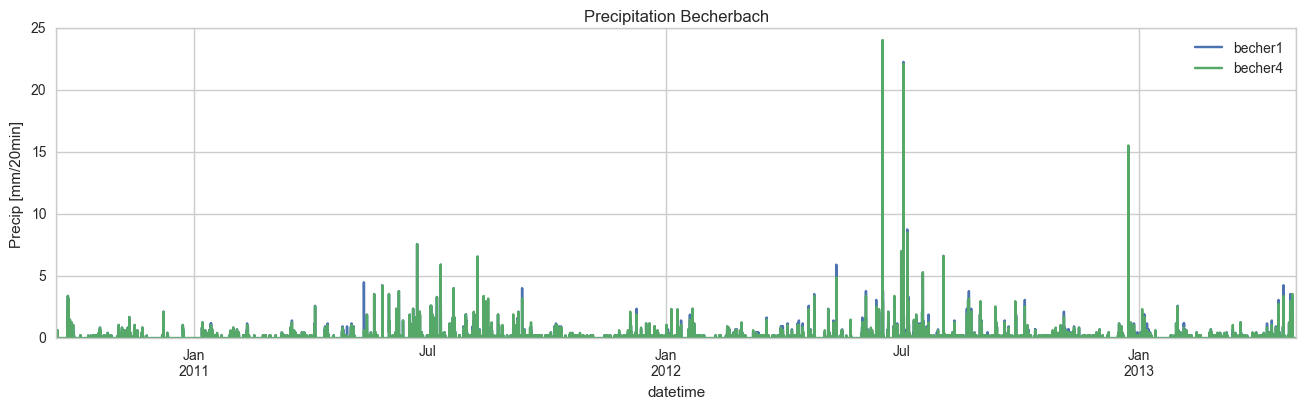

In [262]:
figsize(16,4)
precip[['becher1','becher4']].plot()
title('Precipitation Becherbach')
ylabel('Precip [mm/20min]')


In [263]:
precip.columns='P_'+precip.columns

### Compile data base (20min)

In [268]:
BecherData = pd.concat([precip,SM.resample('20min').mean(),piezo,condB[['C_muScm', 'T_C']].resample('20min').mean(),Becher[['TWa_C','Q_m3s']].resample('20min').mean()])

In [269]:
BecherData.to_csv('BecherData.csv')